In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.05)


In [4]:
X

array([[ 8.71272015e-01,  4.29509575e-01],
       [ 7.55673110e-01,  6.36517350e-01],
       [ 9.11067536e-01, -4.55303015e-01],
       [ 6.76949195e-01,  7.80378707e-01],
       [-8.43415416e-01,  6.01308181e-01],
       [ 1.02876959e+00, -4.30523719e-01],
       [ 7.49149630e-01, -5.31835177e-01],
       [ 1.26025428e+00, -4.65566306e-01],
       [ 2.33388582e-01,  9.59453865e-01],
       [ 3.05226409e-01, -1.32379364e-01],
       [-2.23780618e-01,  8.54817951e-01],
       [ 9.56408670e-01,  2.01717589e-01],
       [ 7.40582997e-01,  5.56444389e-01],
       [-9.93564541e-01,  2.12852628e-01],
       [ 2.79825311e-01, -2.31748970e-01],
       [ 9.27372518e-01,  6.00772213e-01],
       [ 6.54801588e-01,  8.15049129e-01],
       [-8.43869651e-01,  5.85098810e-01],
       [ 7.32007563e-01, -4.63609060e-01],
       [ 1.49025109e+00, -3.53204385e-01],
       [ 1.74889347e+00, -1.28880340e-01],
       [-8.22530197e-01,  3.81756466e-01],
       [ 1.28029284e+00, -2.72079970e-01],
       [ 2.

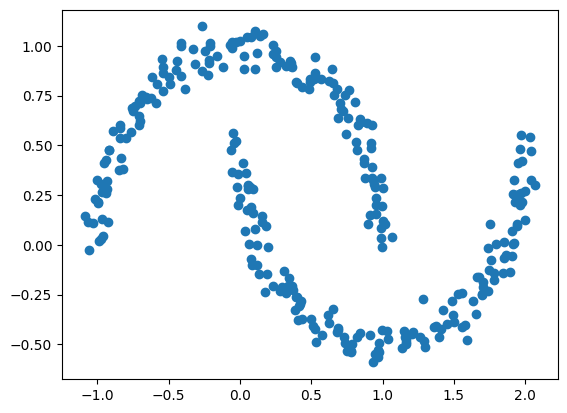

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [7]:
X_scaled= scaler.fit_transform(X)

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.arange(0.1, 2.0, 0.1)
best_score = -1
best_eps = None

for eps in eps_values:
    model = DBSCAN(eps=eps, min_samples=5)
    labels = model.fit_predict(X_scaled)

    # Skip if all points are labeled as noise
    if len(set(labels)) <= 1:
        continue

    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_score = score
        best_eps = eps

print(f"Best eps: {best_eps} with silhouette score: {best_score:.3f}")


Best eps: 0.30000000000000004 with silhouette score: 0.386


In [9]:
best_model=DBSCAN(eps=0.30000000000000004)
best_model.fit(X_scaled)

DBSCAN(eps=0.30000000000000004)

In [10]:
best_model.labels_

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1])

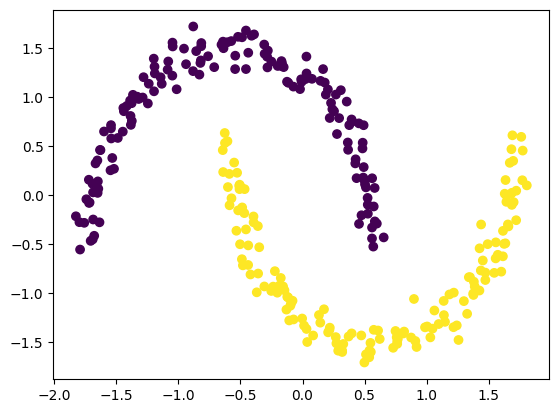

In [11]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_model.labels_)

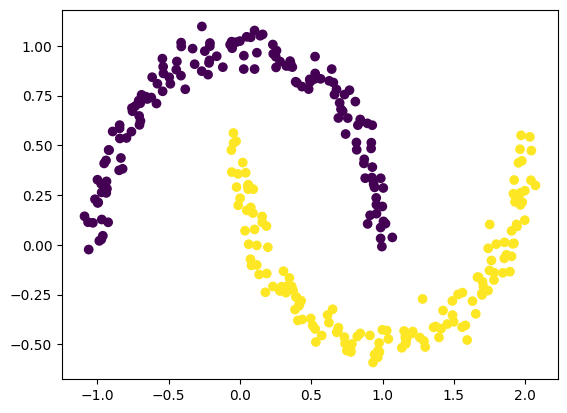

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

def assign_to_cluster(model, X_scaled_data, new_point):
    """
    Assigns a new data point to a cluster based on a fitted DBSCAN model.

    Args:
        model: A fitted DBSCAN model instance.
        X_scaled_data: The scaled data used to fit the DBSCAN model.
        new_point: The new data point (as a NumPy array or list) to assign.

    Returns:
        The cluster label (integer) if the point is within eps of a core point,
        or -1 if it's considered noise.
    """
    # Get the indices of the core points
    core_samples_indices = model.core_sample_indices_
    # Get the core points data
    core_points = X_scaled_data[core_samples_indices]
    # Get the labels of the core points
    core_point_labels = model.labels_[core_samples_indices]

    # Calculate distances from the new point to all core points
    distances = euclidean_distances([new_point], core_points)

    # Find the minimum distance to a core point
    min_distance = np.min(distances)
    min_distance_idx = np.argmin(distances)

    # Check if the minimum distance is within the epsilon of the model
    if min_distance <= model.eps:
        # Assign the new point to the cluster of the nearest core point
        return core_point_labels[min_distance_idx]
    else:
        # If not within eps of any core point, consider it noise
        return -1

# The new data point you want to classify
new_data_point = np.array([ 1.85481717e+00, -6.47690252e-02])

# Scale the new data point using the same scaler fitted on the training data
new_data_point_scaled = scaler.transform([new_data_point])

# Assign the new point to a cluster
assigned_cluster = assign_to_cluster(best_model, X_scaled, new_data_point_scaled[0])

print(f"The new data point {new_data_point} is assigned to cluster: {assigned_cluster}")

The new data point [ 1.85481717 -0.06476903] is assigned to cluster: 1
